# Mandelbrot set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from IPython.display import HTML
from functools import lru_cache

In [2]:
x_start=-2
x_end = 2
y_start=-2
y_end = 2
step = 0.01
x,y=np.mgrid[x_start:x_end:step, y_start:y_end:step]
complex_space = np.zeros(shape=(len(x),len(y)), dtype=complex)

In [3]:
def gen_complex_plane(start,end,step):
    x,y=np.mgrid[start:end:step,start:end:step]
    complex_space = np.zeros(shape=(len(x),len(x)), dtype=complex)
    complex_space.real=x
    complex_space.imag=y
    return complex_space

@lru_cache(maxsize=None)
def gen_set_rek(iteration,start,end,step):
    if iteration==0:
        complex_plane = gen_complex_plane(start,end,step)
        return np.zeros(complex_plane.shape, dtype=complex)
    complex_plane = gen_complex_plane(start,end,step)
    return gen_set_rek(iteration-1,start,end,step)**2+complex_plane

Wall time: 42 ms


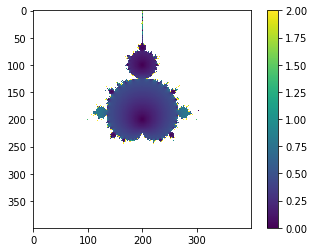

In [9]:
%%time
arr = gen_set_rek(40,-2,2,0.01)
plt.imshow(np.abs(arr),vmin=0, vmax=2)
plt.colorbar()

Wall time: 56 ms


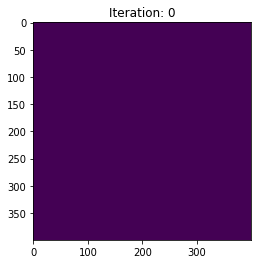

In [7]:
%%time

fig, ax = plt.subplots()
line2d, = ax.plot([], [], lw=2)
ax_global = ax

def animate(i):
    arr = gen_set_rek(i,-2,2,0.01)
    ax_global.imshow(np.abs(arr),vmin=0, vmax=2)
    ax_global.set_title('Iteration: ' + str(i))
#     print("Frame ",i)
    return line2d,
anim = animation.FuncAnimation(fig, animate, frames=100, interval=1000, blit=True)


In [8]:
%%time
HTML(anim.to_jshtml())

d:\programs\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in absolute
  import sys
d:\programs\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
d:\programs\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in square
  


Wall time: 1min 26s
